<a href="https://colab.research.google.com/github/annadutkiewicz/dw_matrix1/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
from skimage import color, exposure

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score

%load_ext tensorboard

In [0]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix-three/Road_Sign_Recognition'

/content/drive/My Drive/Colab Notebooks/matrix/matrix-three/Road_Sign_Recognition


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [0]:
len(np.unique(y_train))

43

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
model = Sequential([
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

  Flatten(),

  Dense(num_classes, activation='softmax')
])

#model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 3s 3ms/step - loss: 10.4671 - accuracy: 0.7651


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

  Flatten(),

  Dense(num_classes, activation='softmax')
])
  
def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train,
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks=[tensorboard_callback]
      )
  
  return model

In [0]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 9ms/step - loss: 11.9769 - accuracy: 0.7749 - val_loss: 0.1833 - val_accuracy: 0.9564
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2007 - accuracy: 0.9543 - val_loss: 0.1574 - val_accuracy: 0.9663
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1200 - accuracy: 0.9720 - val_loss: 0.1354 - val_accuracy: 0.9677
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1231 - accuracy: 0.9739 - val_loss: 0.1156 - val_accuracy: 0.9723
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1143 - accuracy: 0.9744 - val_loss: 0.0996 - val_accuracy: 0.9782


In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):

  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return accuracy_score(y_test_norm, y_pred)

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [0]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  MaxPool2D(),
  Dropout(0.3),  

  Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(num_classes, activation='softmax')
])


train_and_predict( get_cnn_v2(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 3s 9ms/step - loss: 5.4269 - accuracy: 0.3459 - val_loss: 1.1053 - val_accuracy: 0.7082
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 1.0051 - accuracy: 0.7007 - val_loss: 0.3588 - val_accuracy: 0.9178
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.5655 - accuracy: 0.8315 - val_loss: 0.1713 - val_accuracy: 0.9575
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3775 - accuracy: 0.8886 - val_loss: 0.0927 - val_accuracy: 0.9800
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2975 - accuracy: 0.9127 - val_loss: 0.0982 - val_accuracy: 0.9791


0.8852607709750567

In [0]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),  

  Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(num_classes, activation='softmax')
])


train_and_predict( get_cnn_v3(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 2.5590 - accuracy: 0.4959 - val_loss: 0.4418 - val_accuracy: 0.8988
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.5759 - accuracy: 0.8300 - val_loss: 0.1565 - val_accuracy: 0.9640
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.3077 - accuracy: 0.9107 - val_loss: 0.0713 - val_accuracy: 0.9830
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1926 - accuracy: 0.9446 - val_loss: 0.0351 - val_accuracy: 0.9923
Epoch 5/5
272/272 [==============================] - 3s 12ms/step - loss: 0.1421 - accuracy: 0.9575 - val_loss: 0.0259 - val_accuracy: 0.9932


0.9657596371882086

In [0]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'),
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),  

  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(num_classes, activation='softmax')
])

train_and_predict( get_cnn_v4(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.5253 - accuracy: 0.3243 - val_loss: 0.8735 - val_accuracy: 0.7378
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.7291 - accuracy: 0.7730 - val_loss: 0.2157 - val_accuracy: 0.9435
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3507 - accuracy: 0.8917 - val_loss: 0.0782 - val_accuracy: 0.9793
Epoch 4/5
272/272 [==============================] - 3s 13ms/step - loss: 0.2170 - accuracy: 0.9333 - val_loss: 0.0511 - val_accuracy: 0.9853
Epoch 5/5
272/272 [==============================] - 3s 13ms/step - loss: 0.1595 - accuracy: 0.9522 - val_loss: 0.0446 - val_accuracy: 0.9858


0.9591836734693877

In [0]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'),
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),  

  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  MaxPool2D(),
  Dropout(0.3),

  Flatten(),

  Dense(1024, activation='relu'),
  Dropout(0.3),

  Dense(1024, activation='relu'),
  Dropout(0.3),
  
  Dense(num_classes, activation='softmax')
])

train_and_predict( get_cnn_v5(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.9722 - accuracy: 0.2242 - val_loss: 1.1458 - val_accuracy: 0.6300
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.9012 - accuracy: 0.7183 - val_loss: 0.1979 - val_accuracy: 0.9399
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.3838 - accuracy: 0.8831 - val_loss: 0.0931 - val_accuracy: 0.9730
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2638 - accuracy: 0.9206 - val_loss: 0.0530 - val_accuracy: 0.9849
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1859 - accuracy: 0.9457 - val_loss: 0.0357 - val_accuracy: 0.9894


0.9696145124716553

In [0]:
X_train_grey = color.rgb2gray( X_train ).reshape(-1, 32, 32, 1)
X_test_grey = color.rgb2gray( X_test ).reshape(-1, 32, 32, 1)

In [0]:
X_train_grey.reshape(-1, 32, 32, 1).shape

(34799, 32, 32, 1)

In [0]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, X_train_grey, y_train, params_fit={})
predict(model_trained, X_test_grey, y_test)

Epoch 1/5
272/272 [==============================] - 4s 15ms/step - loss: 2.9668 - accuracy: 0.1853 - val_loss: 1.0404 - val_accuracy: 0.6653
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.7043 - accuracy: 0.7630 - val_loss: 0.1612 - val_accuracy: 0.9508
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2817 - accuracy: 0.9083 - val_loss: 0.0622 - val_accuracy: 0.9840
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1688 - accuracy: 0.9474 - val_loss: 0.0332 - val_accuracy: 0.9912
Epoch 5/5
272/272 [==============================] - 4s 14ms/step - loss: 0.1289 - accuracy: 0.9600 - val_loss: 0.0316 - val_accuracy: 0.9899


0.9616780045351474

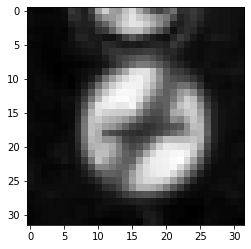

In [0]:
plt.imshow( color.rgb2gray( X_train[0] ), cmap=plt.get_cmap('gray') )